In [8]:
import awkward as ak
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import pandas as pd
import os
import mplhep as hep
plt.style.use(hep.style.CMS)

In [2]:
inputdir_ele = "/work/dvalsecc/Clustering/dataset/electrons_awkward_2022v9_onlycalomatched/training/"
inputdir_gamma = "/work/dvalsecc/Clustering/dataset/gammas_awkward_2022v9_onlycalomatched/training/"
cols = ["cl_features", "seed_features", "cl_labels", "window_features", "window_metadata", "cl_h"]

N = 1000000
df_ele = ak.from_parquet(inputdir_ele, lazy=True, use_threads=True, columns=cols)[0:N]
df_gamma = ak.from_parquet(inputdir_gamma, lazy=True, use_threads=True, columns=cols)[0:N]

df = ak.concatenate([df_ele, df_gamma])

In [28]:
df_ele = ak.from_parquet("/eos/user/r/rdfexp/ecal/cluster/output_deepcluster_dumper/windows_data/electrons/awkward_2022v9_onlycalomatched/validation",
                    lazy=True, use_threads=True )

df_gamma = ak.from_parquet("/eos/user/r/rdfexp/ecal/cluster/output_deepcluster_dumper/windows_data/gammas/awkward_2022v9_onlycalomatched/validation",
                    lazy=True, use_threads=True )

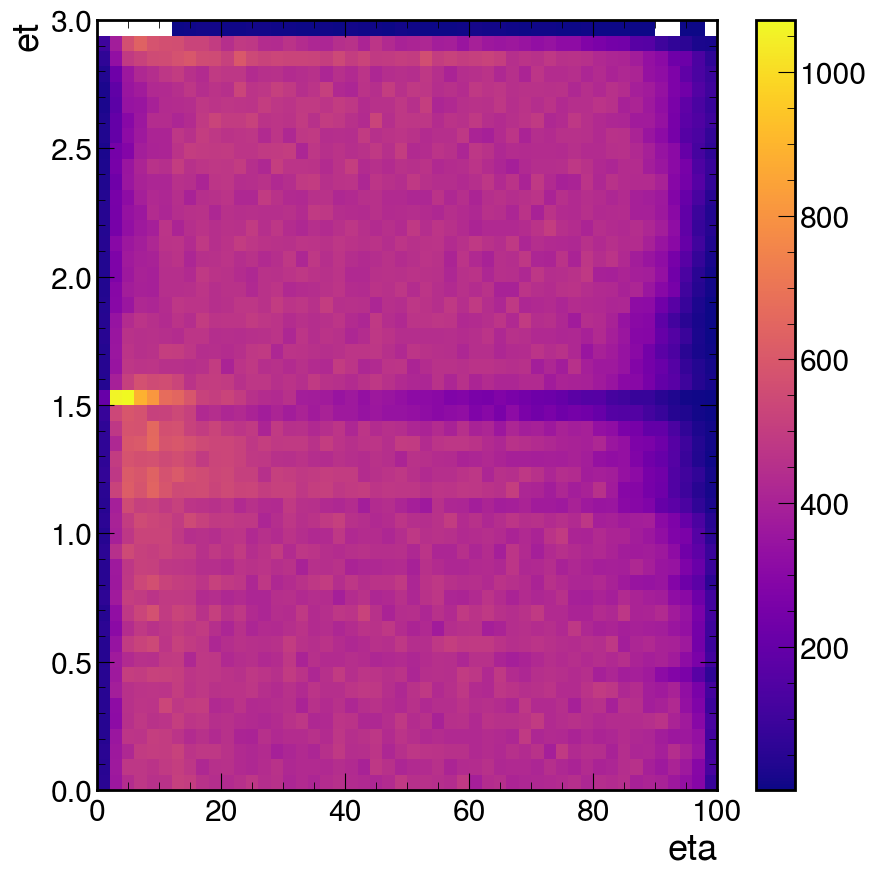

In [6]:
plt.hist2d(ak.to_numpy(df_ele.seed_features.et_seed),
           abs(ak.to_numpy(df_ele.seed_features.seed_eta)), 
           range=((0,100),(0,3)), bins=(50,50), cmap="plasma", cmin=1 )
plt.xlabel("eta")
plt.ylabel("et")
plt.colorbar()

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Preliminary '))

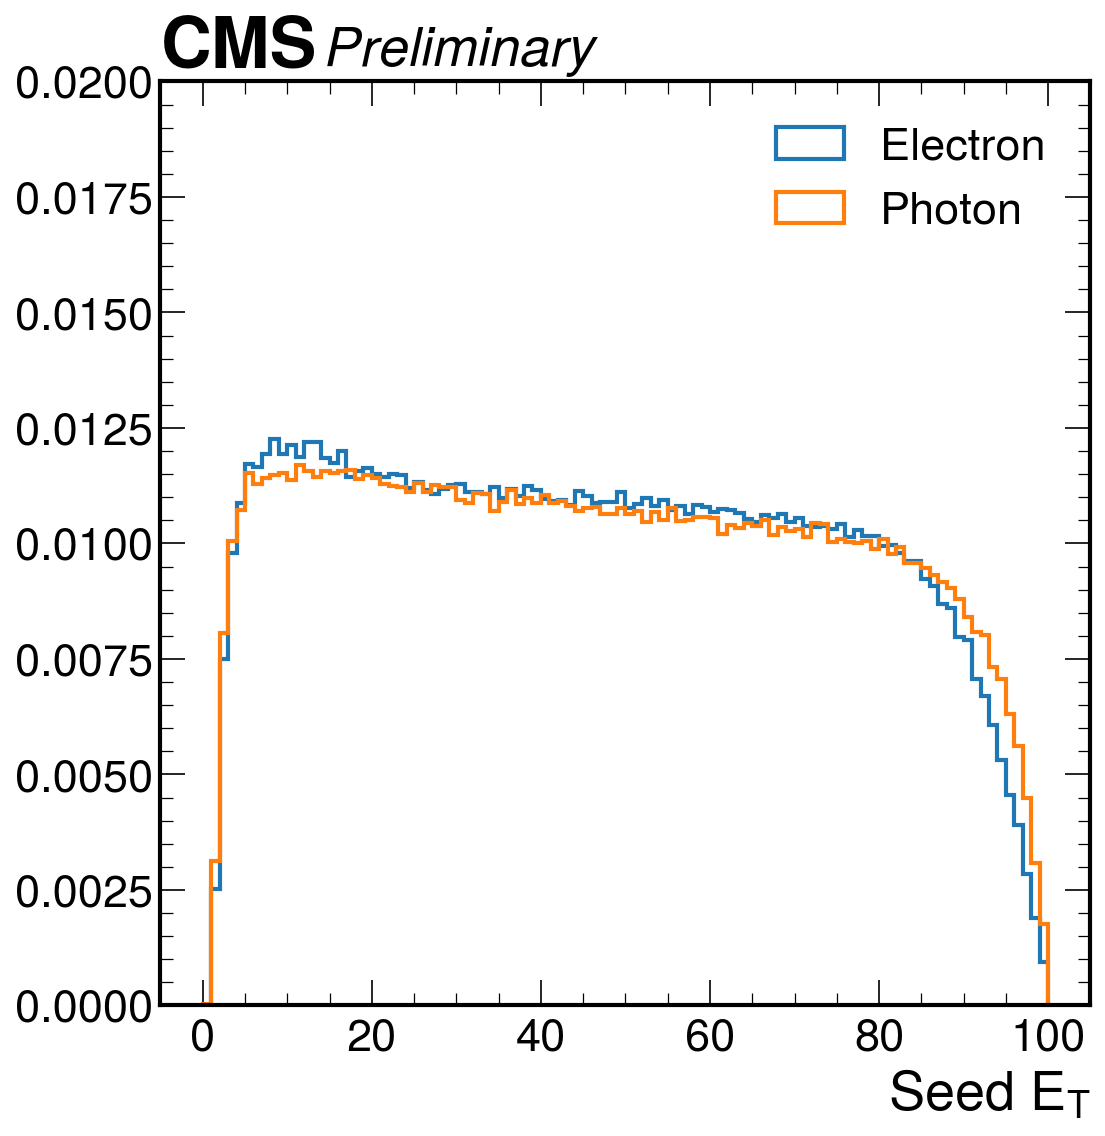

In [7]:
fig, ax = plt.subplots(1,1, figsize=(8,8),dpi=150)
ax.hist(df_ele.seed_features.et_seed, bins=100, range=(0,100), histtype="step", label="Electron", linewidth=2, density=True)
ax.hist(df_gamma.seed_features.et_seed, bins=100, range=(0,100), histtype="step", label="Photon", linewidth=2, density=True)
ax.legend()
ax.set_ylim(0, 0.02)
ax.set_xlabel("Seed $E_T$")
hep.cms.text("Preliminary ",loc=0, ax=ax)


In [7]:
df.cl_labels.in_scluster[0:10].tolist()

[[True, False, False, False],
 [True, False, False],
 [True, False, False, False, False, False, False, False],
 [True, True, True, False, False, False, False, False, False, False],
 [True, True, False, False, False, False, False, False, False, False, False],
 [True, True, True, True, True, True, True, True, False],
 [True,
  True,
  True,
  True,
  True,
  True,
  False,
  False,
  False,
  False,
  False,
  False],
 [True, False, False, False],
 [True, True, False, False, False],
 [True]]

In [8]:
df.cl_labels.is_seed[0:10].tolist()

[[True, False, False, False],
 [True, False, False],
 [True, False, False, False, False, False, False, False],
 [True, False, False, False, False, False, False, False, False, False],
 [True, False, False, False, False, False, False, False, False, False, False],
 [True, False, False, False, False, False, False, False, False],
 [True,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False],
 [True, False, False, False],
 [True, False, False, False, False],
 [True]]

In [10]:
df.window_metadata.ncls[0:10].tolist()

[4, 3, 8, 10, 11, 9, 12, 4, 5, 1]

In [14]:
ncls_true = ak.sum(df.cl_labels.in_scluster, axis=1)

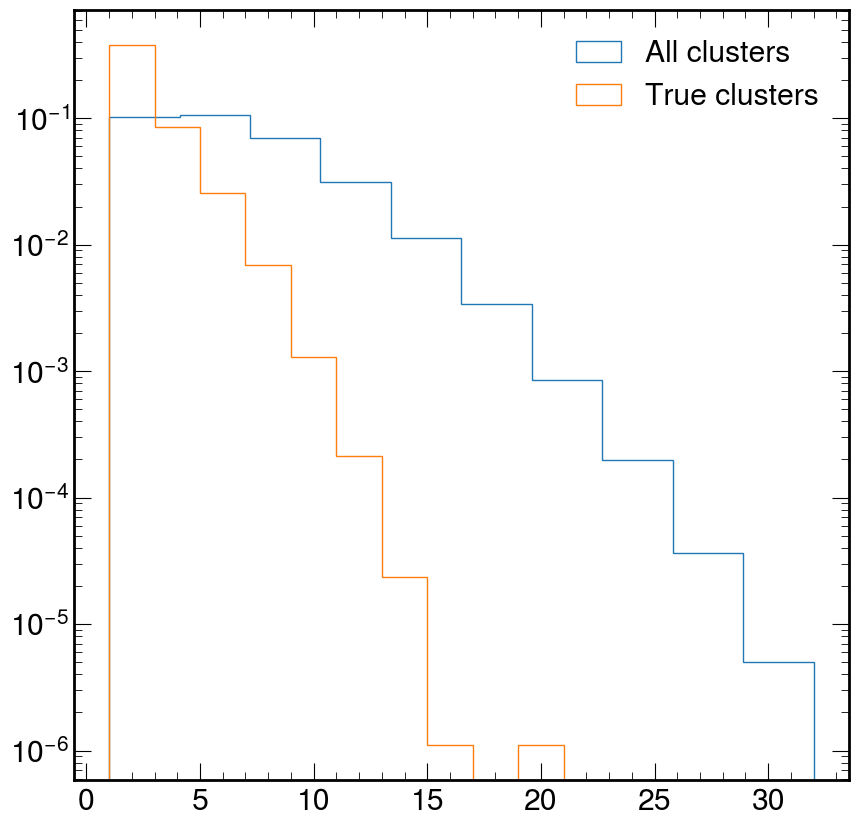

In [20]:
plt.hist(df.window_metadata.ncls, histtype="step", label="All clusters", density=True)
plt.hist(ncls_true, histtype="step", label="True clusters", density=True)
plt.yscale("log")
plt.legend()

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Preliminary '))

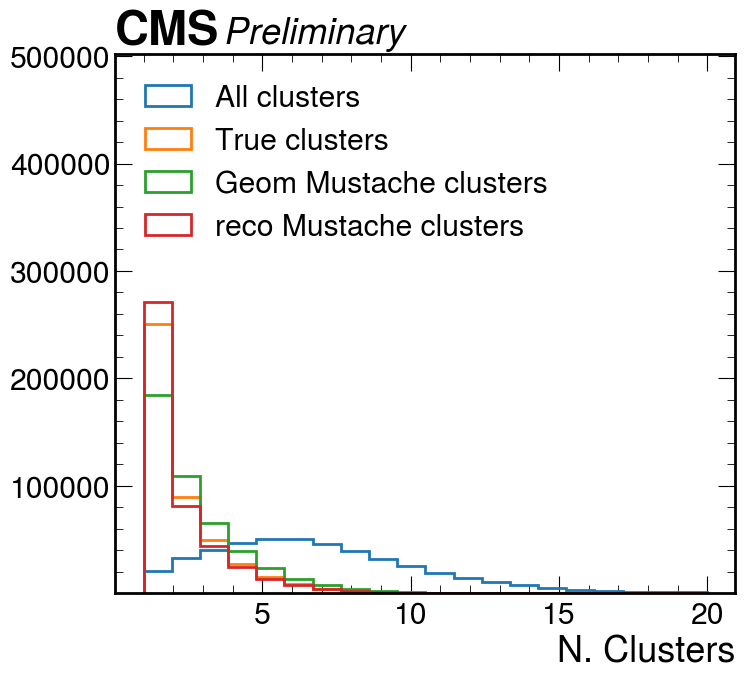

In [89]:
fig, ax = plt.subplots(1,1, figsize=(8,7))

dfx = df[(ak.sum(df.cl_labels.in_mustache, axis=1)>0)]
ncls_true = ak.sum(dfx.cl_labels.in_scluster, axis=1)
ncls_must = ak.sum(dfx.cl_labels.in_mustache, axis=1)
ncls_geom_must = ak.sum(dfx.cl_labels.in_geom_mustache, axis=1)
        
ax.hist(dfx.window_metadata.ncls,bins=20, range=(1,20), histtype='step', linewidth=2, label='All clusters')
A = ax.hist(ncls_true, bins=20, range=(1,20), histtype='step', linewidth=2, label='True clusters')
ax.hist(ncls_geom_must, bins=20, range=(1,20), histtype='step', linewidth=2, label='Geom Mustache clusters')
ax.hist(ncls_must,bins=20, range=(1,20), histtype='step', linewidth=2, label='reco Mustache clusters')

maxY = np.max(A[0])
ax.legend(loc="upper left")
#ax[j,i].set_yscale('log')
ax.set_ylim(1, 2 * maxY)
ax.set_xlabel("N. Clusters")

hep.cms.text("Preliminary ",loc=0, ax=ax)


(exptext: Custom Text(0.001, 1, 'CMS'),
 expsuffix: Custom Text(0.001, 1.005, 'Preliminary '))

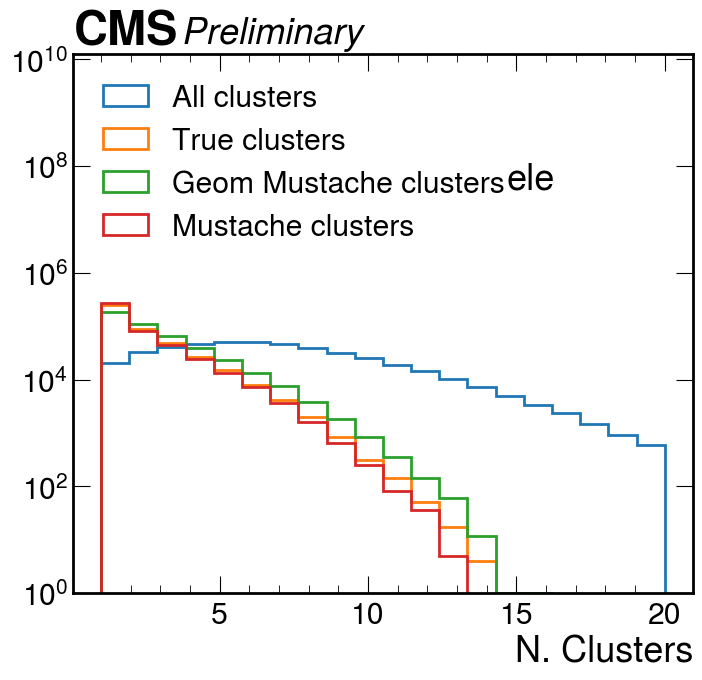

In [88]:
fig, ax = plt.subplots(1,1, figsize=(8,7))

dfx = df[(ak.sum(df.cl_labels.in_mustache, axis=1)>0)]
ncls_true = ak.sum(dfx.cl_labels.in_scluster, axis=1)
ncls_must = ak.sum(dfx.cl_labels.in_mustache, axis=1)
ncls_geom_must = ak.sum(dfx.cl_labels.in_geom_mustache, axis=1)
        
ax.hist(dfx.window_metadata.ncls,bins=20, range=(1,20), histtype='step', linewidth=2, label='All clusters')
A = ax.hist(ncls_true, bins=20, range=(1,20), histtype='step', linewidth=2, label='True clusters')
ax.hist(ncls_geom_must, bins=20, range=(1,20), histtype='step', linewidth=2, label='Geom Mustache clusters')
ax.hist(ncls_must,bins=20, range=(1,20), histtype='step', linewidth=2, label='Mustache clusters')

maxY = np.max(A[0])
ax.legend(loc="upper left")
ax.set_yscale('log')
ax.set_ylim(1, 5e4 * maxY)
ax.set_xlabel("N. Clusters")
ax.text(0.7, 0.75, flavour, transform=ax.transAxes)

hep.cms.text("Preliminary ",loc=0, ax=ax)


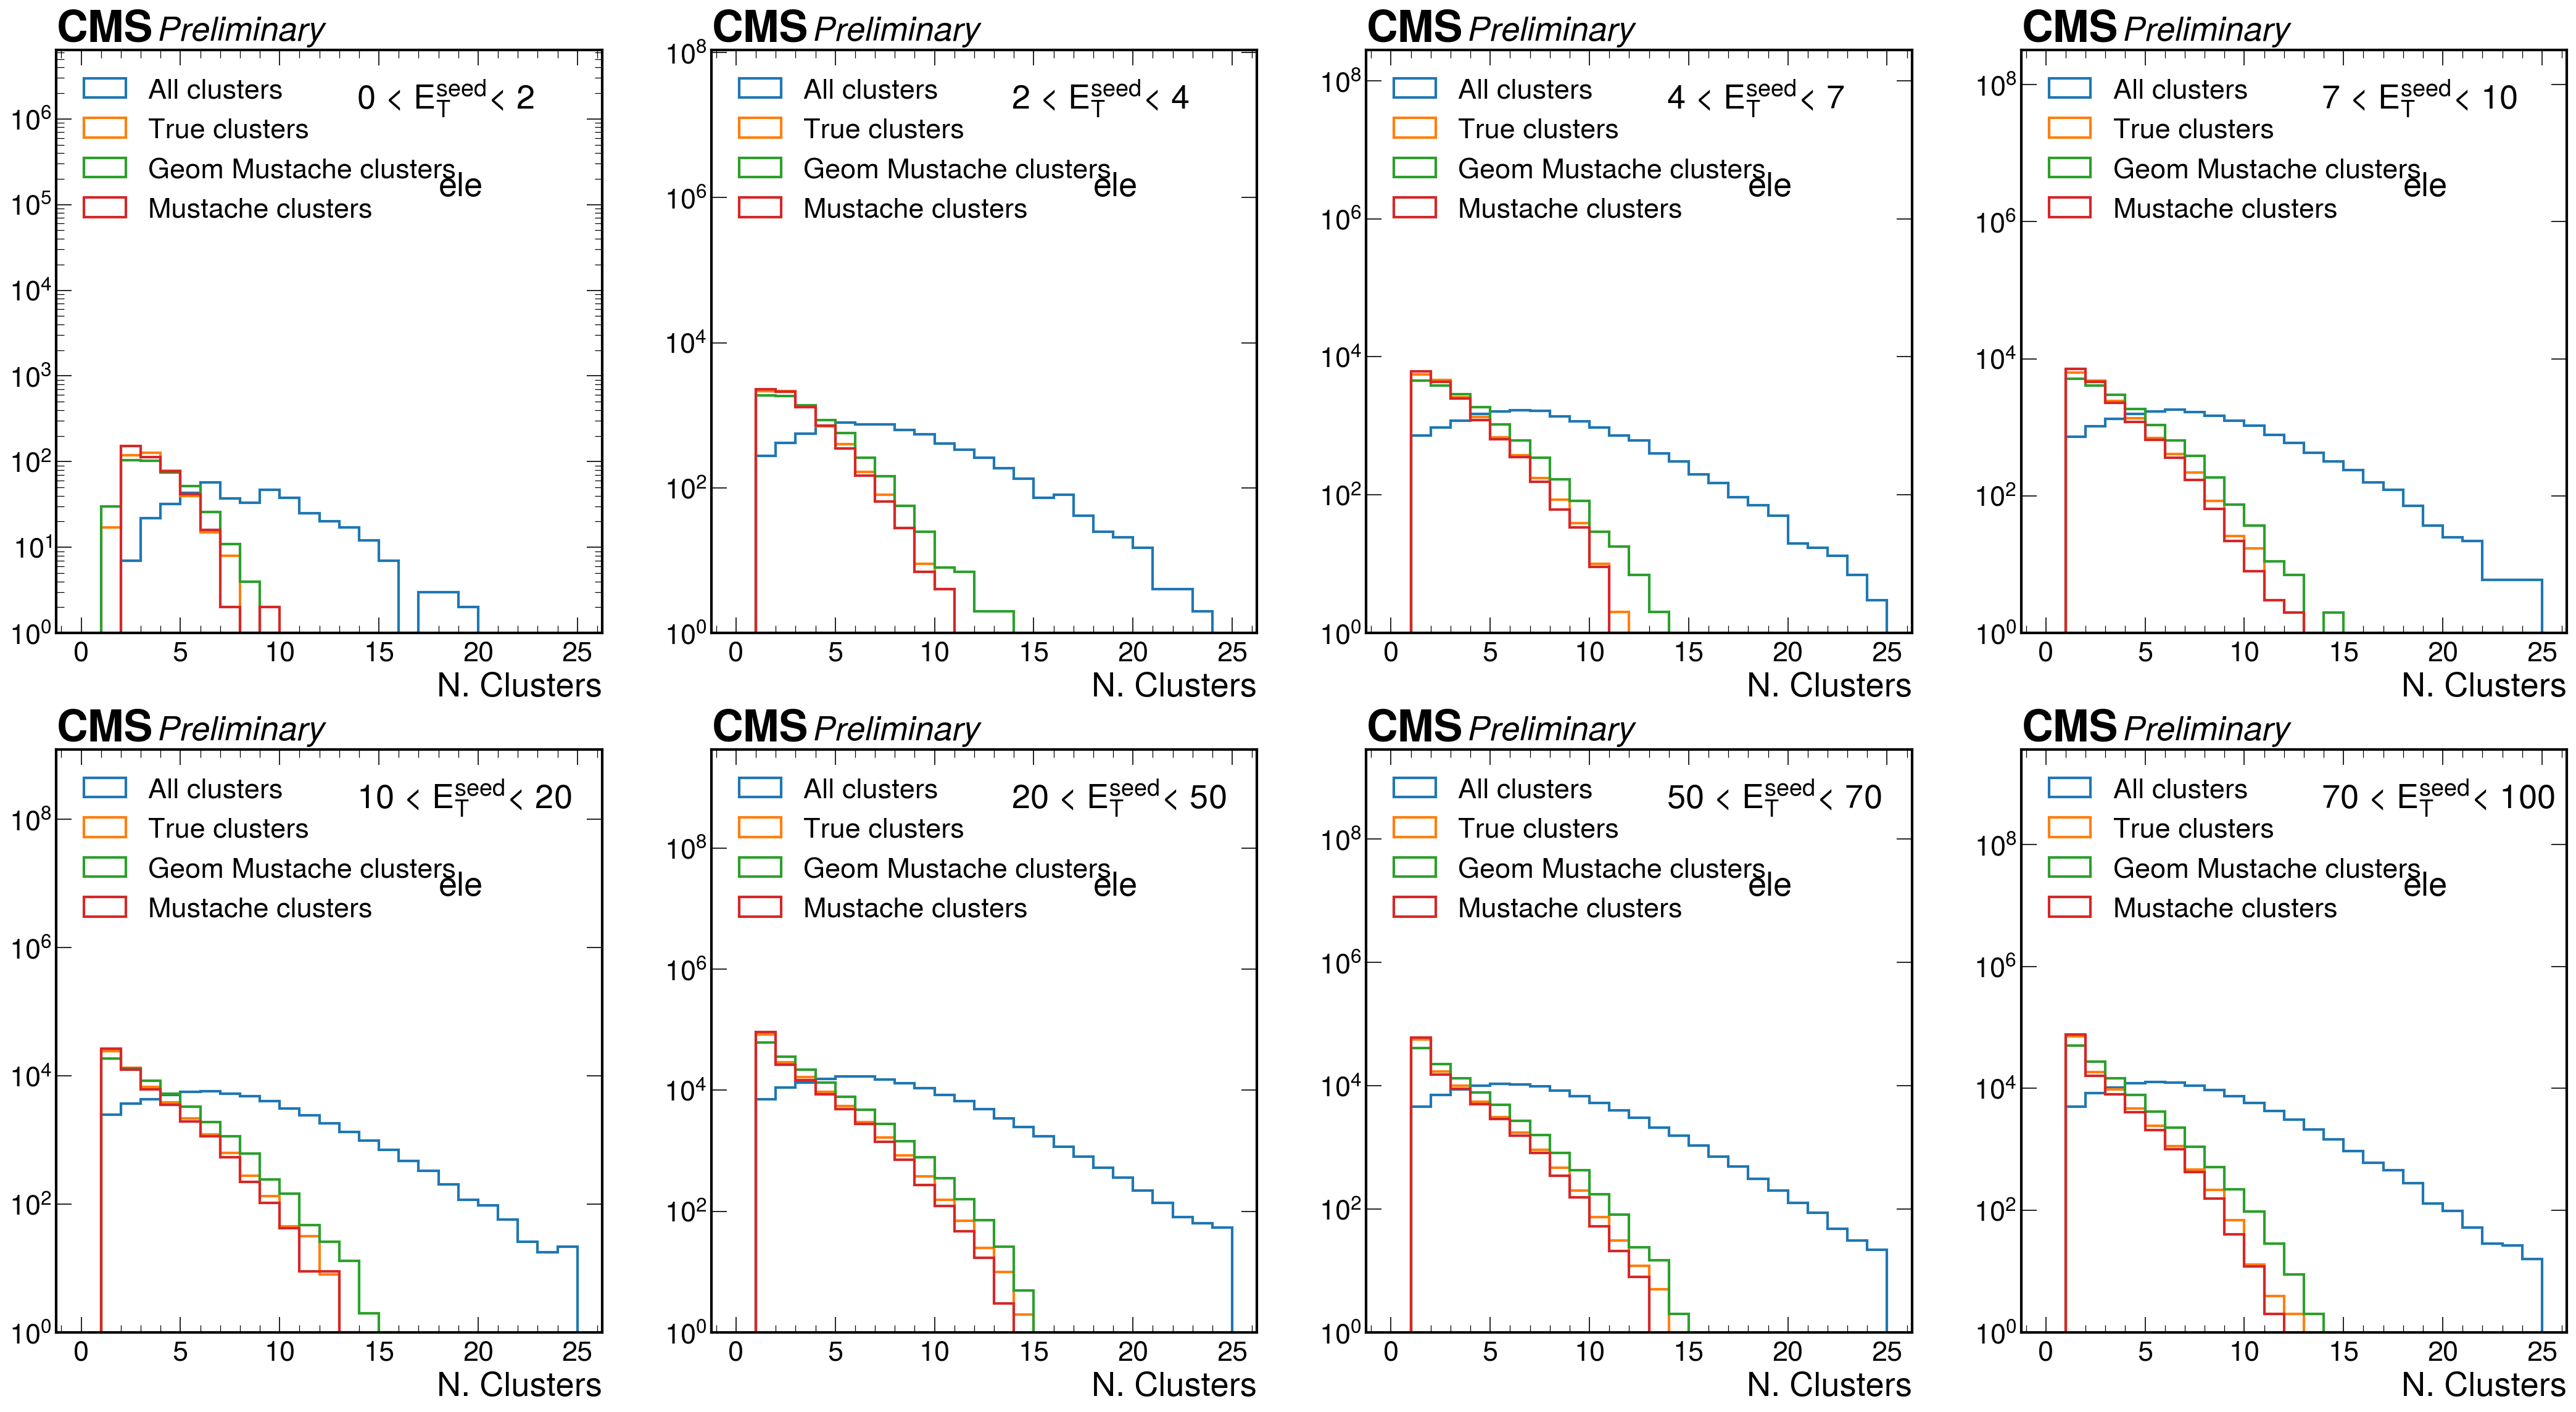

In [52]:
fig, ax = plt.subplots(2,4, figsize=(35,18),dpi=150)

xrange = (0,25)
bins= 25
flavour = "ele"

ets = [ [(0,2),(2,4),(4,7),(7,10)],[(10,20),(20,50),(50,70),(70,100)]]

for j,etss in enumerate(ets): 
    for i, (e1,e2) in enumerate(etss): 
        dfx = df[(df.seed_features.et_seed>=e1) & (df.seed_features.et_seed<e2) & (ak.sum(df.cl_labels.in_mustache, axis=1)>0)]
        ncls_true = ak.sum(dfx.cl_labels.in_scluster, axis=1)
        ncls_must = ak.sum(dfx.cl_labels.in_mustache, axis=1)
        ncls_geom_must = ak.sum(dfx.cl_labels.in_geom_mustache, axis=1)
        
        ax[j,i].hist(dfx.window_metadata.ncls,bins=bins, range=xrange, histtype='step', linewidth=2, label='All clusters')
        A = ax[j,i].hist(ncls_true, bins=bins, range=xrange, histtype='step', linewidth=2, label='True clusters')
        ax[j,i].hist(ncls_geom_must, bins=bins, range=xrange, histtype='step', linewidth=2, label='Geom Mustache clusters')
        ax[j,i].hist(ncls_must, bins=bins, range=xrange, histtype='step', linewidth=2, label='Mustache clusters')
        
        maxY = np.max(A[0])
        ax[j,i].legend(loc="upper left")
        ax[j,i].set_yscale('log')
        ax[j,i].set_ylim(1, 5e4 * maxY)
        ax[j,i].set_xlabel("N. Clusters")
        ax[j,i].text(0.55,0.9,  str(e1) + ' < $E_T^{seed}$< ' + str(e2), transform = ax[j,i].transAxes)  
        ax[j,i].text(0.7, 0.75, flavour, transform=ax[j,i].transAxes)

        hep.cms.text("Preliminary ",loc=0, ax=ax[j,i])


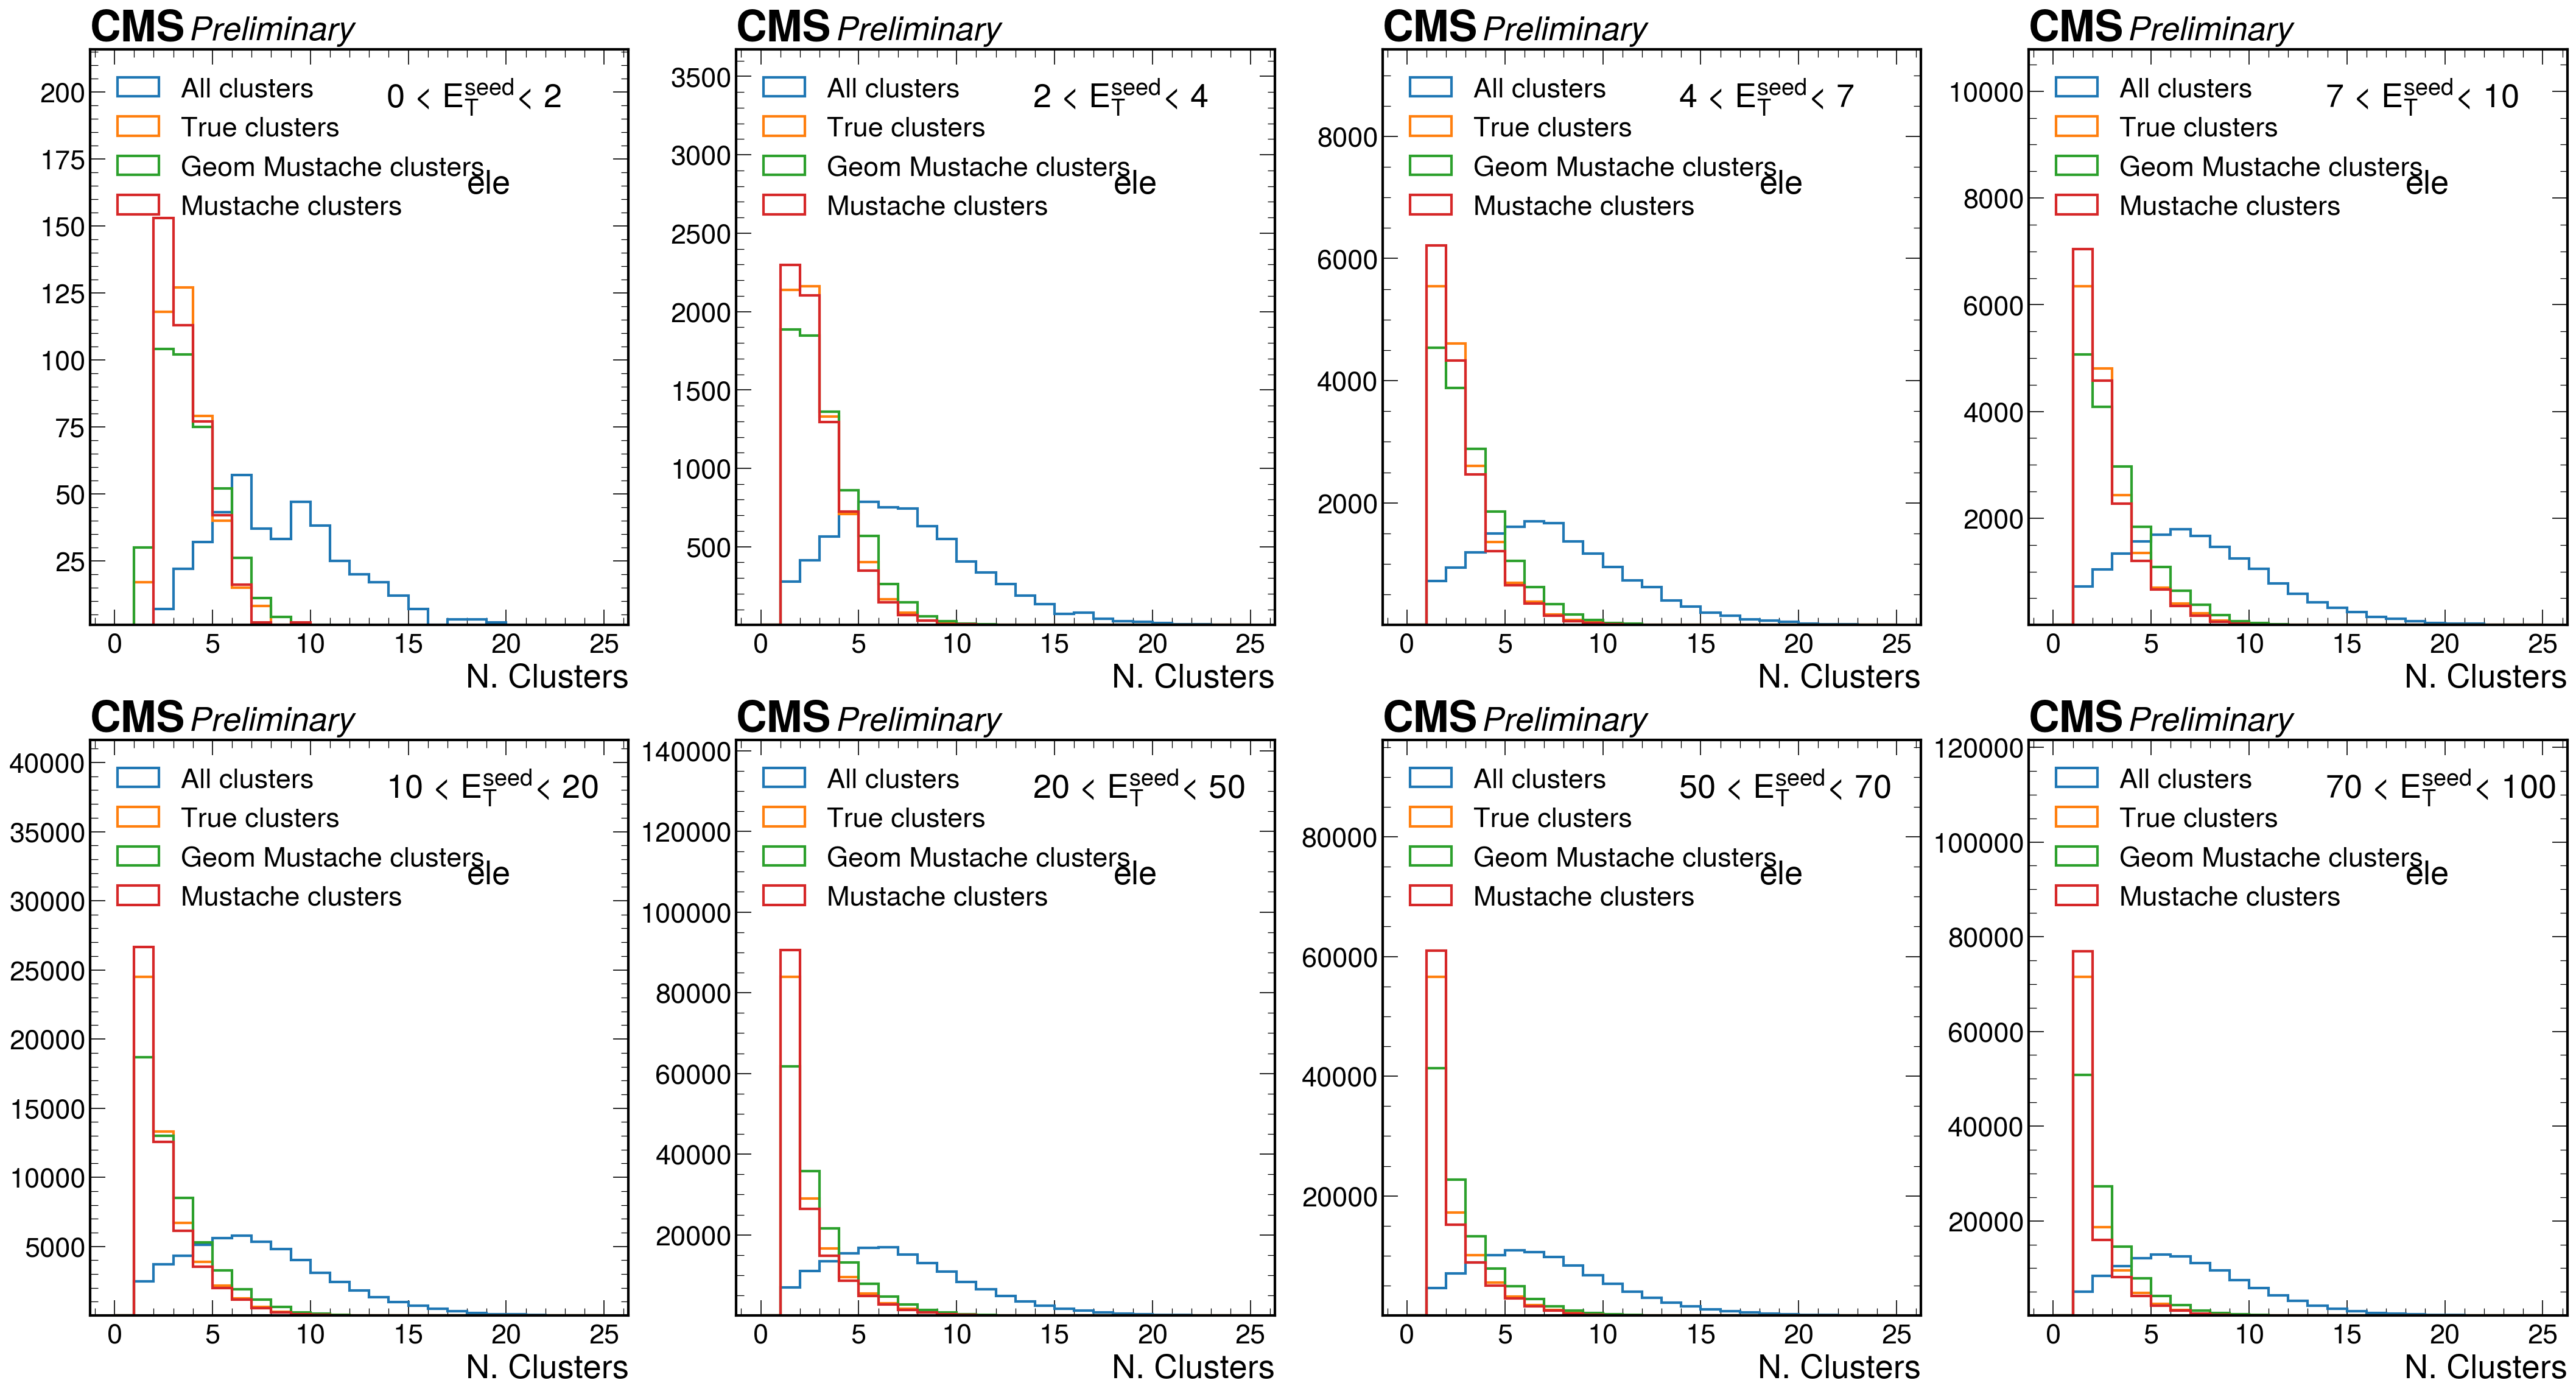

In [54]:
fig, ax = plt.subplots(2,4, figsize=(35,18),dpi=150)

xrange = (0,25)
bins= 25
flavour = "ele"

ets = [ [(0,2),(2,4),(4,7),(7,10)],[(10,20),(20,50),(50,70),(70,100)]]

for j,etss in enumerate(ets): 
    for i, (e1,e2) in enumerate(etss): 
        dfx = df[(df.seed_features.et_seed>=e1) & (df.seed_features.et_seed<e2) & (ak.sum(df.cl_labels.in_mustache, axis=1)>0)]
        ncls_true = ak.sum(dfx.cl_labels.in_scluster, axis=1)
        ncls_must = ak.sum(dfx.cl_labels.in_mustache, axis=1)
        ncls_geom_must = ak.sum(dfx.cl_labels.in_geom_mustache, axis=1)
        
        ax[j,i].hist(dfx.window_metadata.ncls,bins=bins, range=xrange, histtype='step', linewidth=2, label='All clusters')
        A = ax[j,i].hist(ncls_true, bins=bins, range=xrange, histtype='step', linewidth=2, label='True clusters')
        ax[j,i].hist(ncls_geom_must, bins=bins, range=xrange, histtype='step', linewidth=2, label='Geom Mustache clusters')
        ax[j,i].hist(ncls_must, bins=bins, range=xrange, histtype='step', linewidth=2, label='Mustache clusters')
        
        maxY = np.max(A[0])
        ax[j,i].legend(loc="upper left")
        #ax[j,i].set_yscale('log')
        ax[j,i].set_ylim(1, 1.7 * maxY)
        ax[j,i].set_xlabel("N. Clusters")
        ax[j,i].text(0.55,0.9,  str(e1) + ' < $E_T^{seed}$< ' + str(e2), transform = ax[j,i].transAxes)  
        ax[j,i].text(0.7, 0.75, flavour, transform=ax[j,i].transAxes)

        hep.cms.text("Preliminary ",loc=0, ax=ax[j,i])


In [58]:
df_ele

<Array [{cl_features: [, ... ] type='449596 * {"cl_features": var * {"en_cluster...'>

In [62]:
at_least_two = ak.sum(df_ele.cl_labels.in_scluster, axis=1)>=2

In [63]:
ak.sum(at_least_two)

197532

In [72]:
et_seed = df_ele[at_least_two].cl_features.et_cluster[:,0]
et_2nd_cl = df_ele[at_least_two].cl_features.et_cluster[:,1]
en_sim = df_ele[at_least_two].window_metadata.et_true_sim_good

(array([ 1.21025984,  8.77995875, 12.67731979, 12.53338604, 11.30184022,
         9.85946187,  8.62892967,  7.71667351,  6.85611186,  6.06548986,
         5.49178209,  4.98902759,  4.82178062,  4.40011555,  3.95919174,
         3.70984172,  3.54056752,  3.26587706,  3.03882664,  2.93341037,
         2.6871012 ,  2.56749429,  2.45599631,  2.33841663,  2.22286418,
         2.17116966,  2.00290908,  1.94918733,  1.81437614,  1.84985277,
         1.66841516,  1.67145601,  1.61063893,  1.52650864,  1.50218181,
         1.43629665,  1.4677188 ,  1.34203018,  1.3602753 ,  1.30351269,
         1.30148546,  1.25789988,  1.23560029,  1.21431431,  1.12714317,
         1.12004784,  1.07139418,  1.0835576 ,  1.00753625,  1.00956349,
         1.01159072,  0.96800515,  0.88387486,  0.92543319,  0.92441958,
         0.86867059,  0.86056165,  0.85447994,  0.78251306,  0.80582628,
         0.79974457,  0.71865513,  0.73892749,  0.71865513,  0.72068237,
         0.75109091,  0.67608318,  0.61627972,  0.6

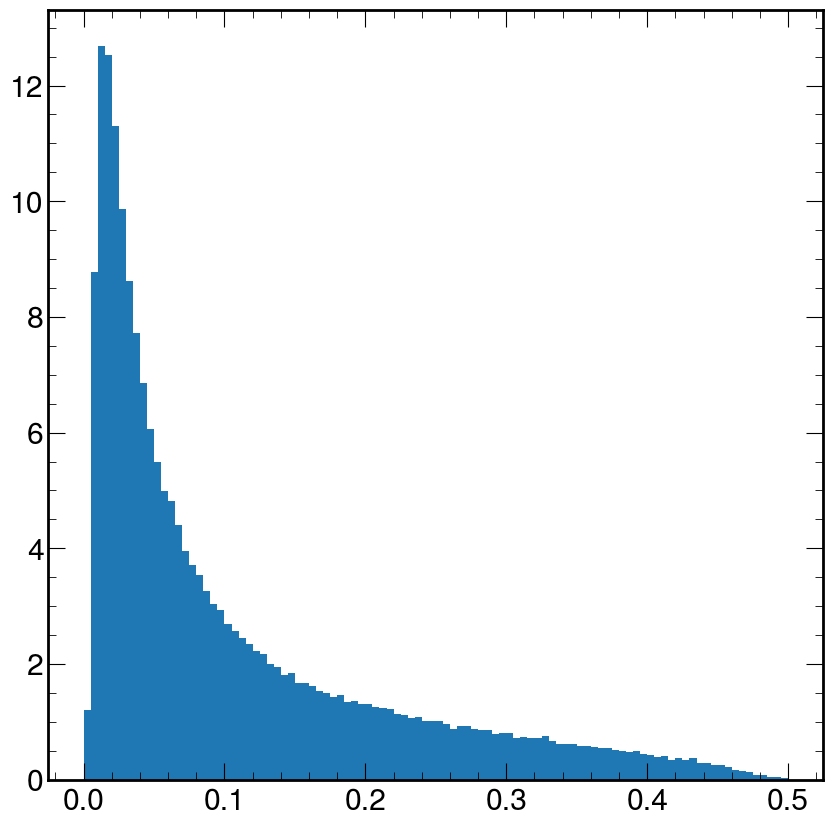

In [75]:
plt.hist(et_2nd_cl / en_sim, range=(0,0.5), bins=100, density=True)

In [ ]:
etas = [0, 0.7, 1.3, 2, 3]

fig, ax = plt.subplots(1,len(etas)-1, figsize=(35,8),dpi=150)

for i in range(len(etas)-1):
    mask = (df.eta>etas[i]) & (df.eta< etas[i+1])
    A = ax[i].hist2d(df[mask].ncls_sel_must, df[mask].ncls_sel, range=((1, 15), (1,15)), bins=(14,14), density=True, cmin=1e-4)
    hep.cms.label(rlabel="14 TeV", loc=0, ax=ax[i])
    ax[i].text(0.1, 0.8, "$\eta$ {}-{}".format(etas[i], etas[i+1]), transform=ax[i].transAxes)
    
    fig.colorbar(A[3] , label="N. cls", ax=ax[i], shrink=0.9)

    ax[i].set_xlabel("Mustache N. clusters")
    ax[i].set_ylabel("DeepSC N. clusters")
